# Regularización LASSO y Ridge con sklearn

https://scikit-learn.org/stable/

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

librerias para graficar 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns    

#### algunos términos

El proceso de ajustar un modelo o un algoritmo a unos datos observados se conoce como entrenamiento

Cross validation: se refiere a la práctica de dividir los datos disponibles en datos de entrenamiento y datos de testeo (validation data). El módulo de skleran más usado es:

sklearn.model_selection

Extracción de características: esta es un paso de la etapa de preprocesamiento del problema de clasificación. Se puede comparar el paquete de extracción de características de sklearn con el papel que juega la librería de fórmulas Patsy en la modelación estadística. La más usada es:

sklearn.feature_extraction

Reducción de la dimensión: se puede aplciar cuando se tiene un número considerable de variables explicativas y muchas de ellas no contribuyen significativamente en la tarea de predicción. Las más usadas son:

sklearn.feature_selection

sklearn.decomposition

#### statmodels y sklearn contienen conjuntos de datos para explorar el uso de los modelos.

En el presente caso se usarán los datos 'Datos_X.csv' y 'Datos_Y.csv' para ajustar una regresión lineal múltiple. La matriz de diseño contiene 50 variables explicativas que se encuentran en el archivo 'Datos_X.csv', y la variable respuesta contenida en el archivo 'Datos_Y.csv' es continua.

In [3]:
X_completo = pd.read_csv('Datos_X.csv', header=None)
y_completo = pd.read_csv('Datos_Y.csv', header=None)

In [4]:
X_completo = np.array(X_completo)
y_completo = np.array(y_completo)
y_completo = np.reshape(y_completo, (len(y_completo), ))

In [5]:
#Los datos se dividen en entrenamiento y testeo 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_completo, y_completo, train_size=0.5)

In [6]:
# statsmodels.api.OLS de la libreria statsmodels             aqui   LinearRegression de linear_model
model = linear_model.LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#Se evalua la suma de cuadrados para ver que tan bueno es el ajuste 
def SSE(residuo):
    return np.sum(residuo**2)

In [9]:
residuo_del_entrenamiento = y_train - model.predict(X_train)

In [10]:
sse_train = SSE(residuo_del_entrenamiento)
sse_train

1.976279583308646e-24

Este error es esencialmente cero. Una causa es que se tiene el doble de variables (características) que de puntos. Pero en realidad este modelo no sirve para predecir los datos que aun no se han visto. Como se puede verificar si se calcula SSE para los datos de testeo:

In [11]:
residuo_del_testeo = y_test - model.predict(X_test)
sse_test = SSE(residuo_del_testeo)
sse_test

471026.85296129266

Una forma adicional de evaluar el ajuste del modelo es con el estadístico $R^2$ como

In [12]:
print('estadistico R2 para entrenamiento :' ,model.score(X_train, y_train), ' y testeo: ',model.score(X_test, y_test))

estadistico R2 para entrenamiento : 1.0  y testeo:  0.6621705627175921


# Esta gran diferencia en el score entre los datos de testeo y de entrenamiento indican que el modelo está sobreajustado (overfitting) 

Se puede tomar una aproximación gráfica para observar los residuos en el conjunto de entrenamiento y en el conjunto de testeo,
y observar los valores de los coeficientes y los residuos.

In [13]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("numero de muestra")
    axes[0].set_ylabel("residuos")
    axes[0].set_title("datos de entrenamiento")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("numero de muestra")
    axes[1].set_ylabel("residuos")
    axes[1].set_title("datos de testeo")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("numero del coeficiente")
    axes[2].set_ylabel("coeficiente")
    fig.tight_layout()
    return fig, axes

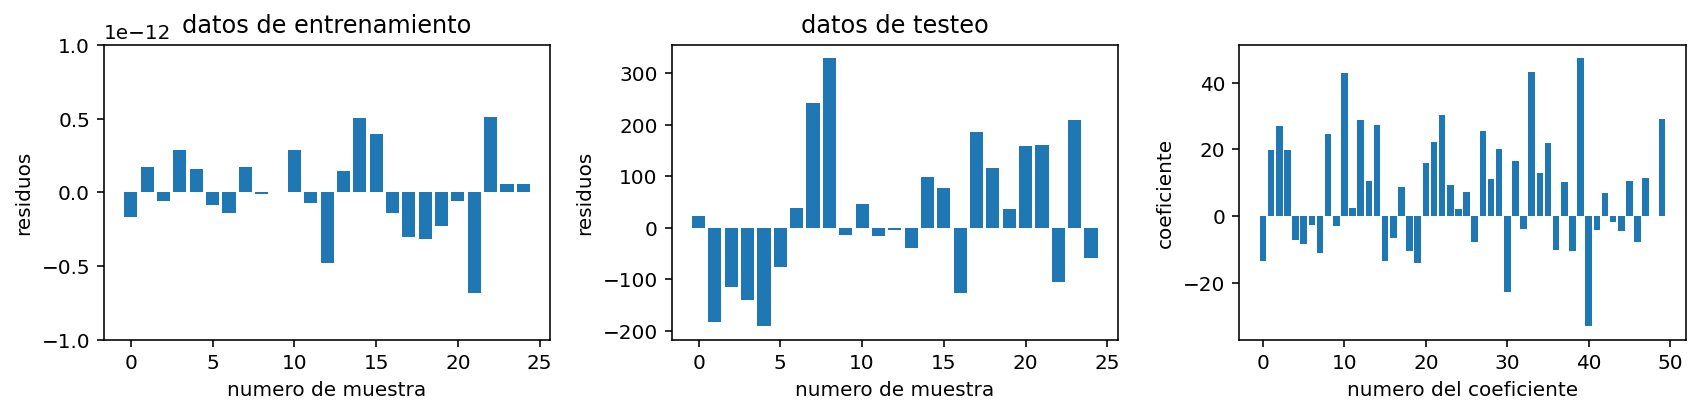

In [14]:
fig, ax = plot_residuals_and_coeff(residuo_del_entrenamiento, residuo_del_testeo, model.coef_)

###### evitar el overfitting 

una forma es consiguiendo más datos. Pero otra forma es regularizando.

$$
\mbox{LASSO}\;\;\;\;\;\;\min \{ ||X \beta - y||_2^2 +\alpha ||\beta||_1  \}
$$

$$
\mbox{Ridge}\;\;\;\;\;\;\min \{ ||X \beta - y||_2^2 +\alpha ||\beta||_2^2  \}
$$

In [15]:
#se instancia el modelo 
model = linear_model.Ridge(alpha=2.5)
#Para ajustar el modelo de regresion a los datos se usa el metodo fit
model.fit(X_train, y_train)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
residuo_del_entrenamiento = y_train - model.predict(X_train)
sse_train = SSE(residuo_del_entrenamiento)
sse_train

2575.5317943133164

In [17]:
residuo_del_testeo = y_test - model.predict(X_test)
sse_train = SSE(residuo_del_testeo)
sse_train

500483.47356344765

Hay una pequeña mejoria en los residuos de los datos de testeo. Podemos graficar usando la función que se construyo

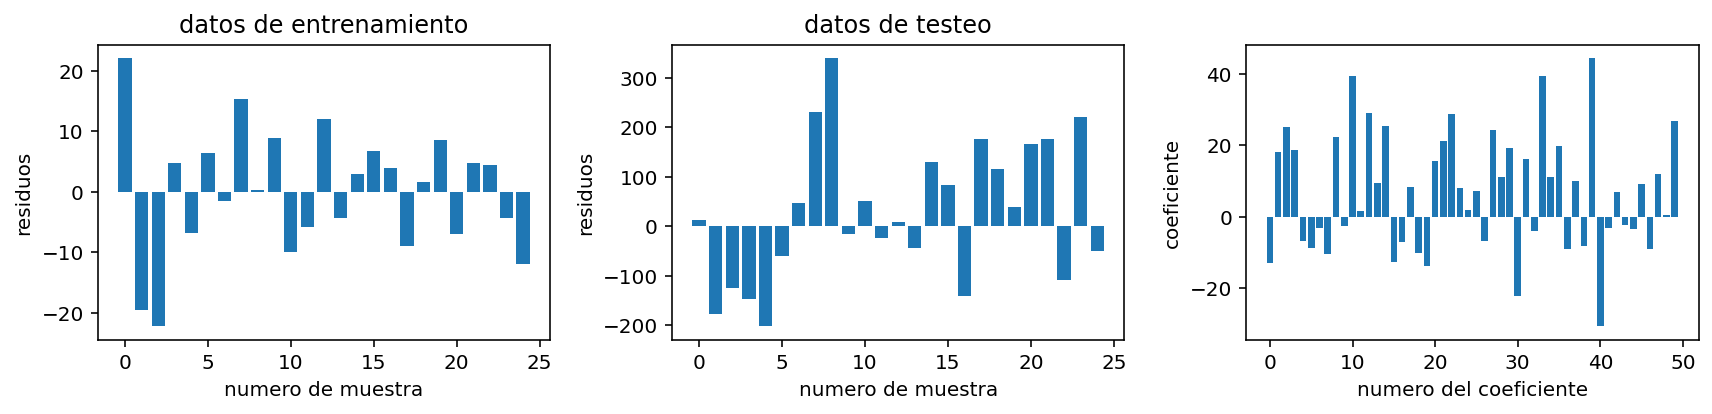

In [18]:
fig, ax = plot_residuals_and_coeff(residuo_del_entrenamiento, residuo_del_testeo,model.coef_)

#### ahora con regresion LASSO

In [19]:
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
residuo_del_entrenamiento = y_train - model.predict(X_train)
sse_train = SSE(residuo_del_entrenamiento)
sse_train

399.80120429460607

In [21]:
residuo_del_testeo = y_test - model.predict(X_test)
sse_train = SSE(residuo_del_testeo)
sse_train

17276.81531993039

Se observa una gran mejoria en la predicción del conjunto de datos de testeo. Aunque el error de entrenamiento es mayor que en el caso de regresión ordinaria
el SSE para los datos de testeo es mucho menor. 

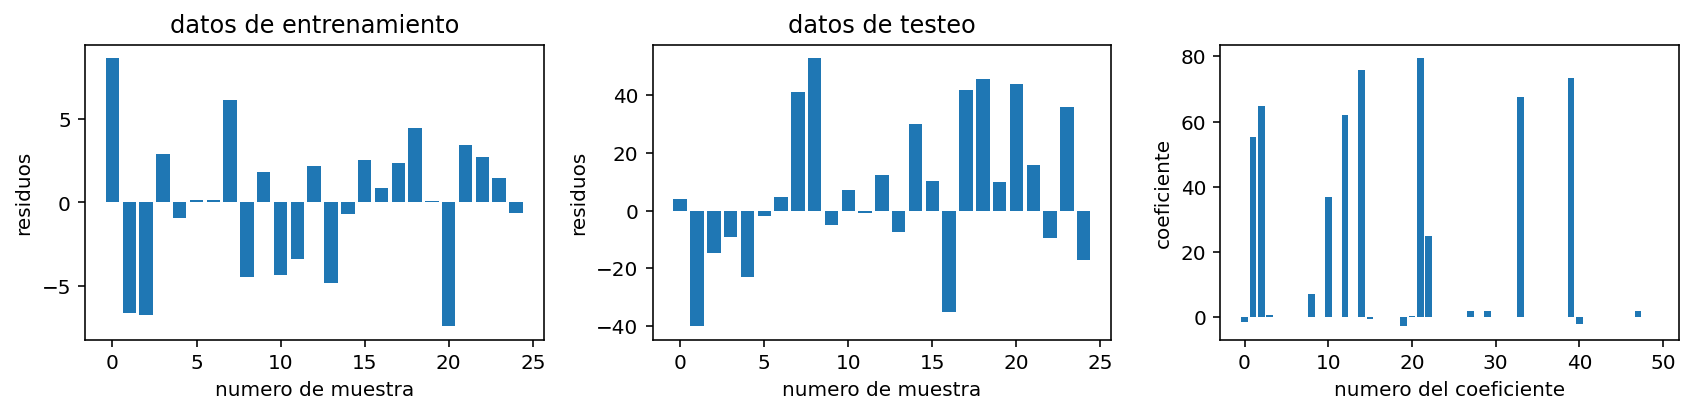

In [22]:
fig, ax = plot_residuals_and_coeff(residuo_del_entrenamiento, residuo_del_testeo, model.coef_)

Algún método para selección del $\alpha$ ? si por ensayo y error

In [23]:
# Se genera un array con los valores de $\alpha$ que se quieren probar 
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [24]:
# se recorren los valores de alpha y se ejecuta la regresion LASSO para cada valor
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = SSE(y_train - model.predict(X_train))
    sse_test[n] = SSE(y_test - model.predict(X_test))

/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.94263767276367, tolerance: 99.39690763334094
  positive)
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.84802842285625, tolerance: 99.39690763334094
  positive)
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.25874190253208, tolerance: 99.39690763334094
  positive)
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the 

Se pueden apreciar los resultados visualmente:

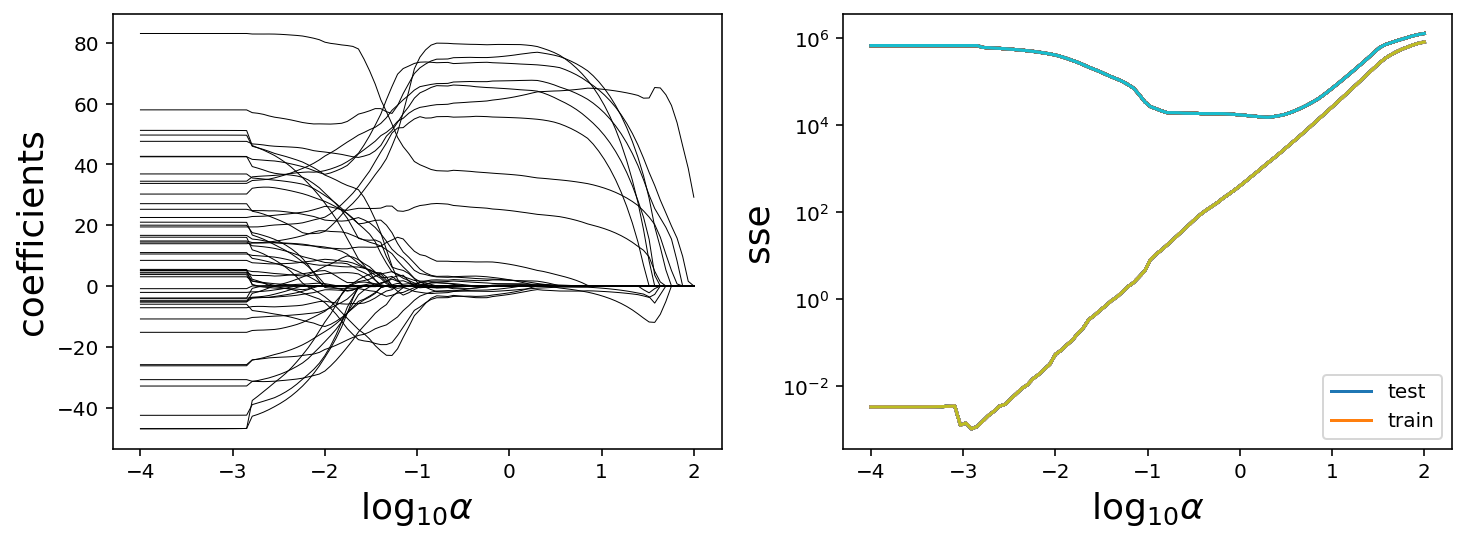

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)
    axes[1].semilogy(np.log10(alphas), sse_train)#, label="train")
    axes[1].semilogy(np.log10(alphas), sse_test)#, label="test")
    #axes[1].legend(loc=0)
    axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
    axes[0].set_ylabel(r"coefficients", fontsize=18)
    axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
    axes[1].set_ylabel(r"sse", fontsize=18)
axes[1].legend(('test','train'))

En el gráfico de la izquierda se aprecia que para valores de alpha pequenos los coeficientes son distintos de cero, esto es overfitting, para los alfas creciendo entre 1 y 2 muchos de los coeficientes colapsan en cero y algunos permanecen distintos de cero. El gráfico de la derecha insinua que hay un conjunto de valores de alfa para los cuales se previene en overfitting y a su vez se mejora la habilidad para predecir en los datos no observados.

###### otra forma de investigar el mejor valor de alpha es usando cross-validation 

In [26]:
# con cross.validation no se le tiene que pasar los datos divididos en entrenamiento y testeo
model = linear_model.LassoCV()
model.fit(X_completo, y_completo)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

El valor del parametro alfa encontrado con una búsqueda cross-validation es " model.alpha_ "

In [27]:
model.alpha_

0.14383020004570754

En este caso coincide con la apreciación gráfica. 

Ahora de nuevo analizamos los errores SSE con el valor de alfa que nos proporcionó cross-validation

In [28]:
residuo_del_entrenamiento = y_train - model.predict(X_train)
sse_train = SSE(residuo_del_entrenamiento)
sse_train

4.418341638015621

In [29]:
residuo_del_testeo = y_test - model.predict(X_test)
sse_test = SSE(residuo_del_testeo)
sse_test

7.220228036284243

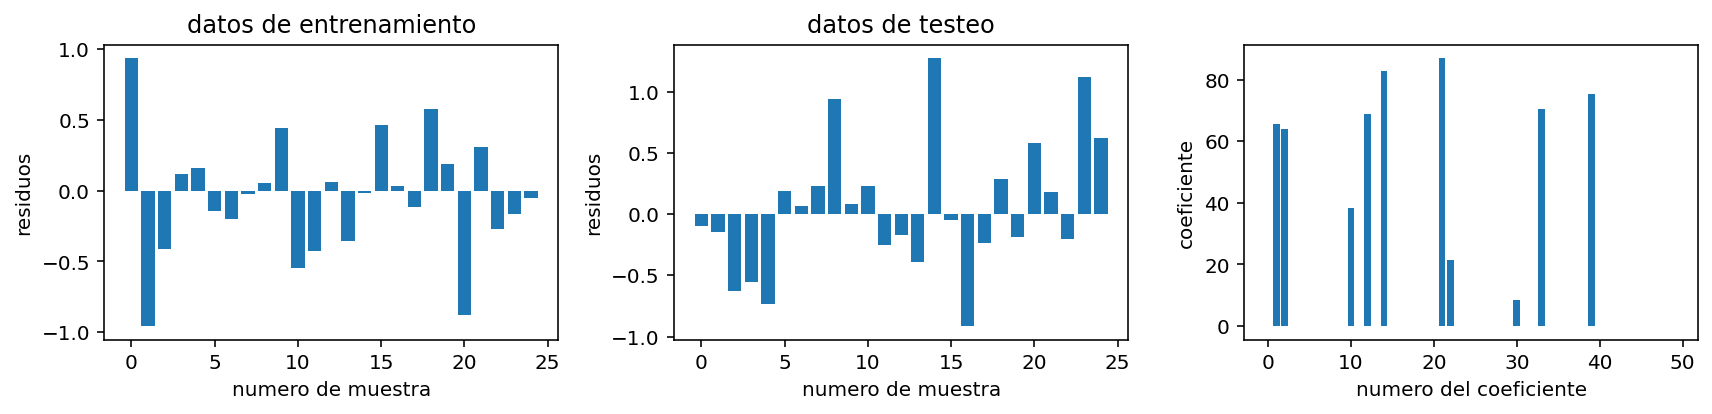

In [30]:
fig, ax = plot_residuals_and_coeff(residuo_del_entrenamiento, residuo_del_testeo, model.coef_)

###### Combinando regularización de LASSO y Ridge

# elastic-net regularization.

$$
\min_{\beta} \left\{ ||X \cdot \beta - y ||_2^2  + \alpha \rho \;||\beta||_1 + \alpha (1-\rho) \;||\beta||_2^2 \right\}
$$

donde el parámetro $\rho$ determina el peso relativo entre las normas L1 y L2 tomadas por las regresiones de LASSO y Ridge. 

In [31]:
# la version cross-validada de elasticnet encuentra los mejores alfa y rho 
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [32]:
model.alpha_

0.6898953486034226

In [33]:
model.l1_ratio

0.5

#### Graficamos para comparar con el método previo

In [34]:
residuo_del_entrenamiento = y_train - model.predict(X_train)
sse_train = SSE(residuo_del_entrenamiento)
sse_train

23228.22841234855

In [35]:
residuo_del_testeo = y_test - model.predict(X_test)
sse_test = SSE(residuo_del_testeo)
sse_test

573427.6109806565

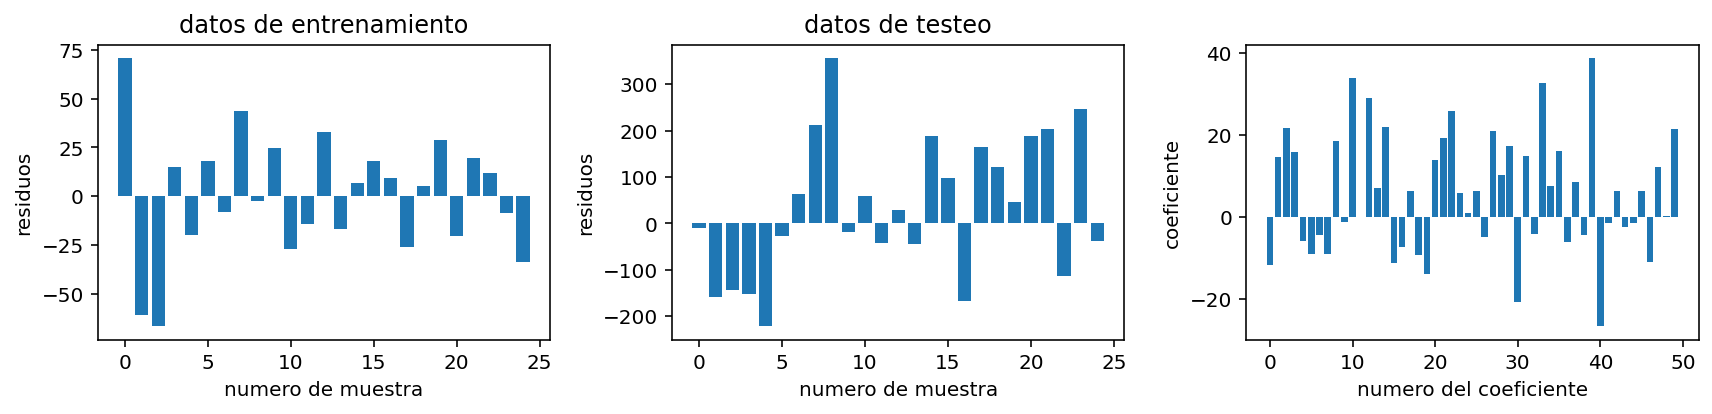

In [36]:
In [52]: fig, ax = plot_residuals_and_coeff(residuo_del_entrenamiento, residuo_del_testeo,model.coef_)